In [50]:
# Data Analysis library import # from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
import datetime

%matplotlib inline

In [51]:
# Replace 'path/to/your/local/boston_housing.csv' with the actual path to your local CSV file
boston_url = '/Users/yassinezribi/Documents/Education/IBM/Week7_Project/boston_housing.csv'

# Read the CSV file into a DataFrame
boston_df = pd.read_csv(boston_url)

# Check the columns of the DataFrame
print("Before dropping 'Unnamed: 0':", boston_df.columns)

# Drop the 'Unnamed: 0' column
boston_df = boston_df.iloc[:, 1:]

# Check the columns again to verify the removal
print("After dropping 'Unnamed: 0':", boston_df.columns)

# Display the first few rows of the DataFrame
boston_df.head()

Before dropping 'Unnamed: 0': Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')
After dropping 'Unnamed: 0': Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [52]:
# Description of the Dataset information
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [53]:
# Summary statistics of the Dataset
boston_df.describe(include = "all")

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [54]:
# Dataset columns list
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

In [55]:
# Filter numeric columns (you may need to adjust based on your DataFrame structure)
numeric_columns = boston_df.select_dtypes(include=[np.number])

# Loop through each numeric column
for column in numeric_columns.columns:
    data_column = boston_df[column]

    # Calculate bin width using Scott's Rule
    bin_width = 3.5 * np.std(data_column) * len(data_column) ** (-1/3)
    print(f"Column: {column}, Bin Width: {bin_width}")

    # Calculate the number of bins
    num_bins_scott = int((np.max(data_column) - np.min(data_column)) / bin_width)
    print(f"Column: {column}, Num Bins: {num_bins_scott}")
    print()

Column: CRIM, Bin Width: 3.774256750102942
Column: CRIM, Num Bins: 23

Column: ZN, Bin Width: 10.23361786348556
Column: ZN, Num Bins: 9

Column: INDUS, Bin Width: 3.0102421225715825
Column: INDUS, Num Bins: 9

Column: CHAS, Bin Width: 0.11144959577328331
Column: CHAS, Num Bins: 8

Column: NOX, Bin Width: 0.050845760176666165
Column: NOX, Num Bins: 9

Column: RM, Bin Width: 0.30830013256912686
Column: RM, Num Bins: 16

Column: AGE, Bin Width: 12.35138906693107
Column: AGE, Num Bins: 7

Column: DIS, Bin Width: 0.923960818883269
Column: DIS, Num Bins: 11

Column: RAD, Bin Width: 3.8206429314064843
Column: RAD, Num Bins: 6

Column: TAX, Bin Width: 73.95210280522312
Column: TAX, Num Bins: 7

Column: PTRATIO, Bin Width: 0.9499526139110478
Column: PTRATIO, Num Bins: 9

Column: LSTAT, Bin Width: 3.1334137392825814
Column: LSTAT, Num Bins: 11

Column: MEDV, Bin Width: 4.035581021562387
Column: MEDV, Num Bins: 11



10


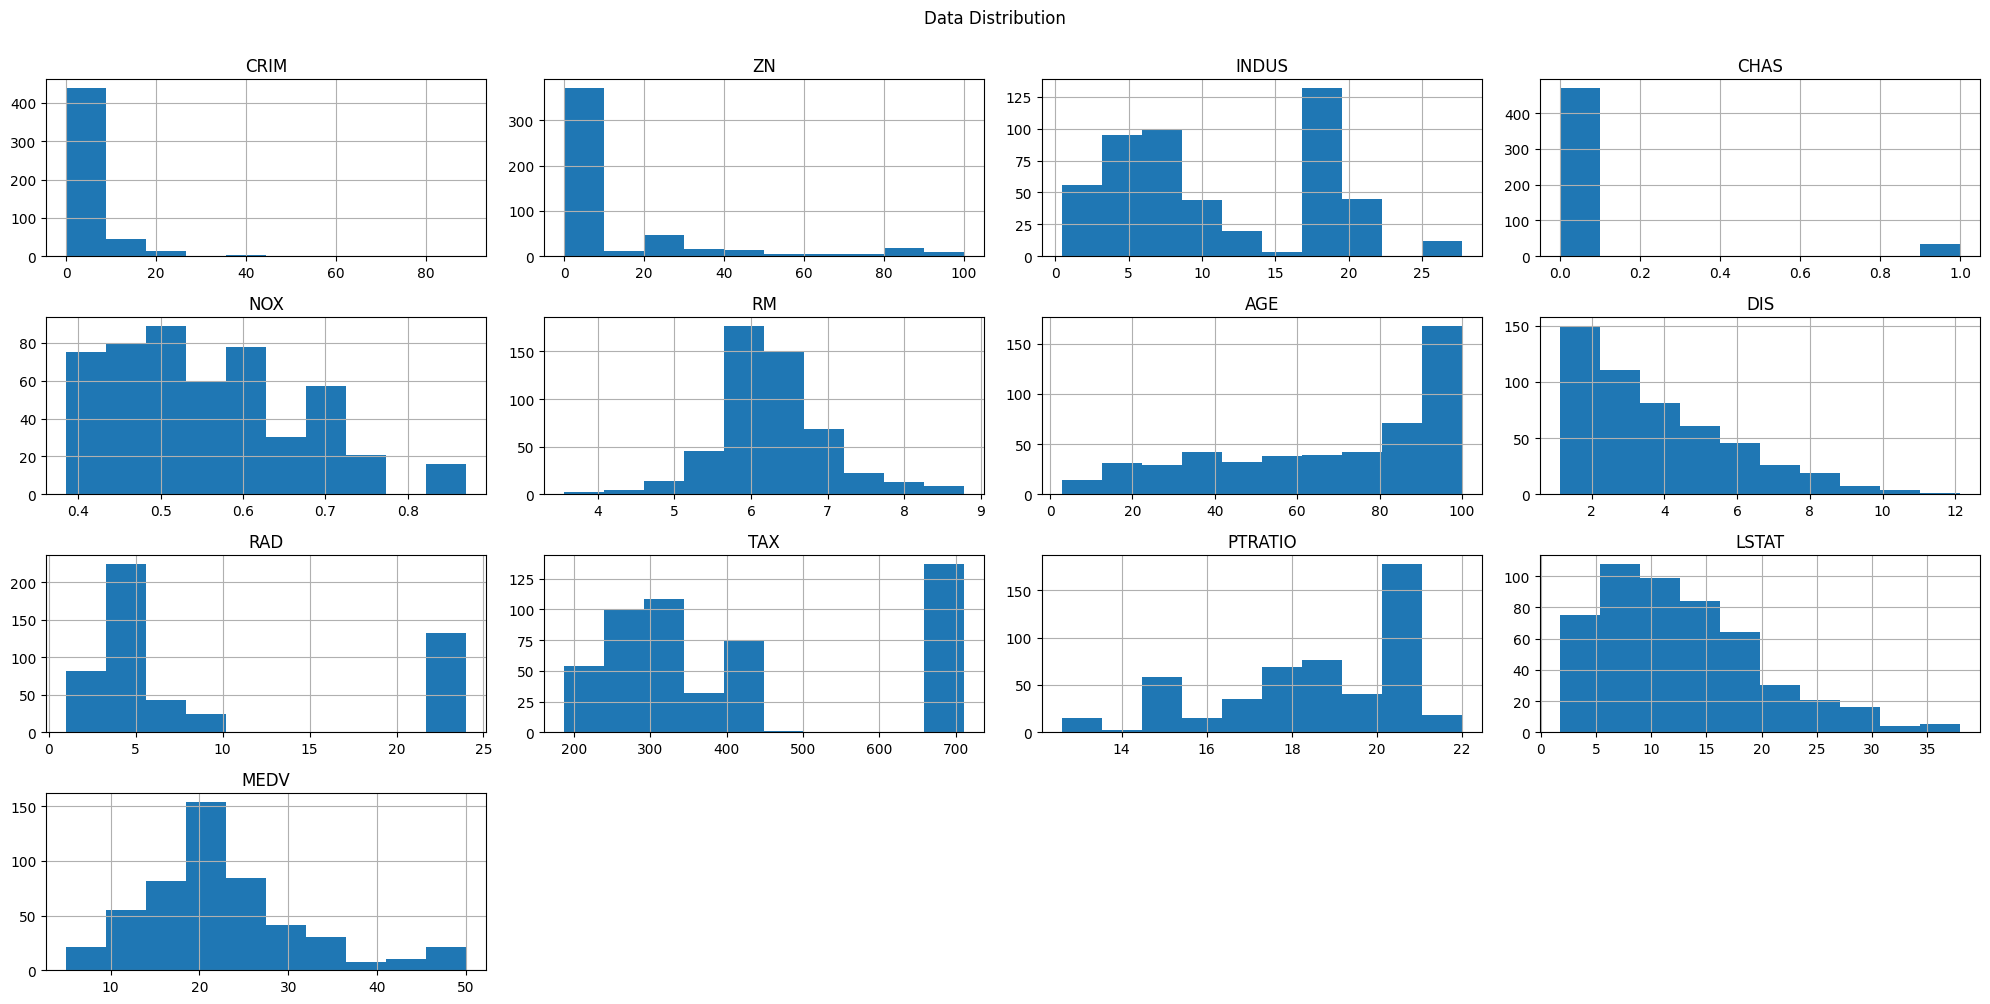

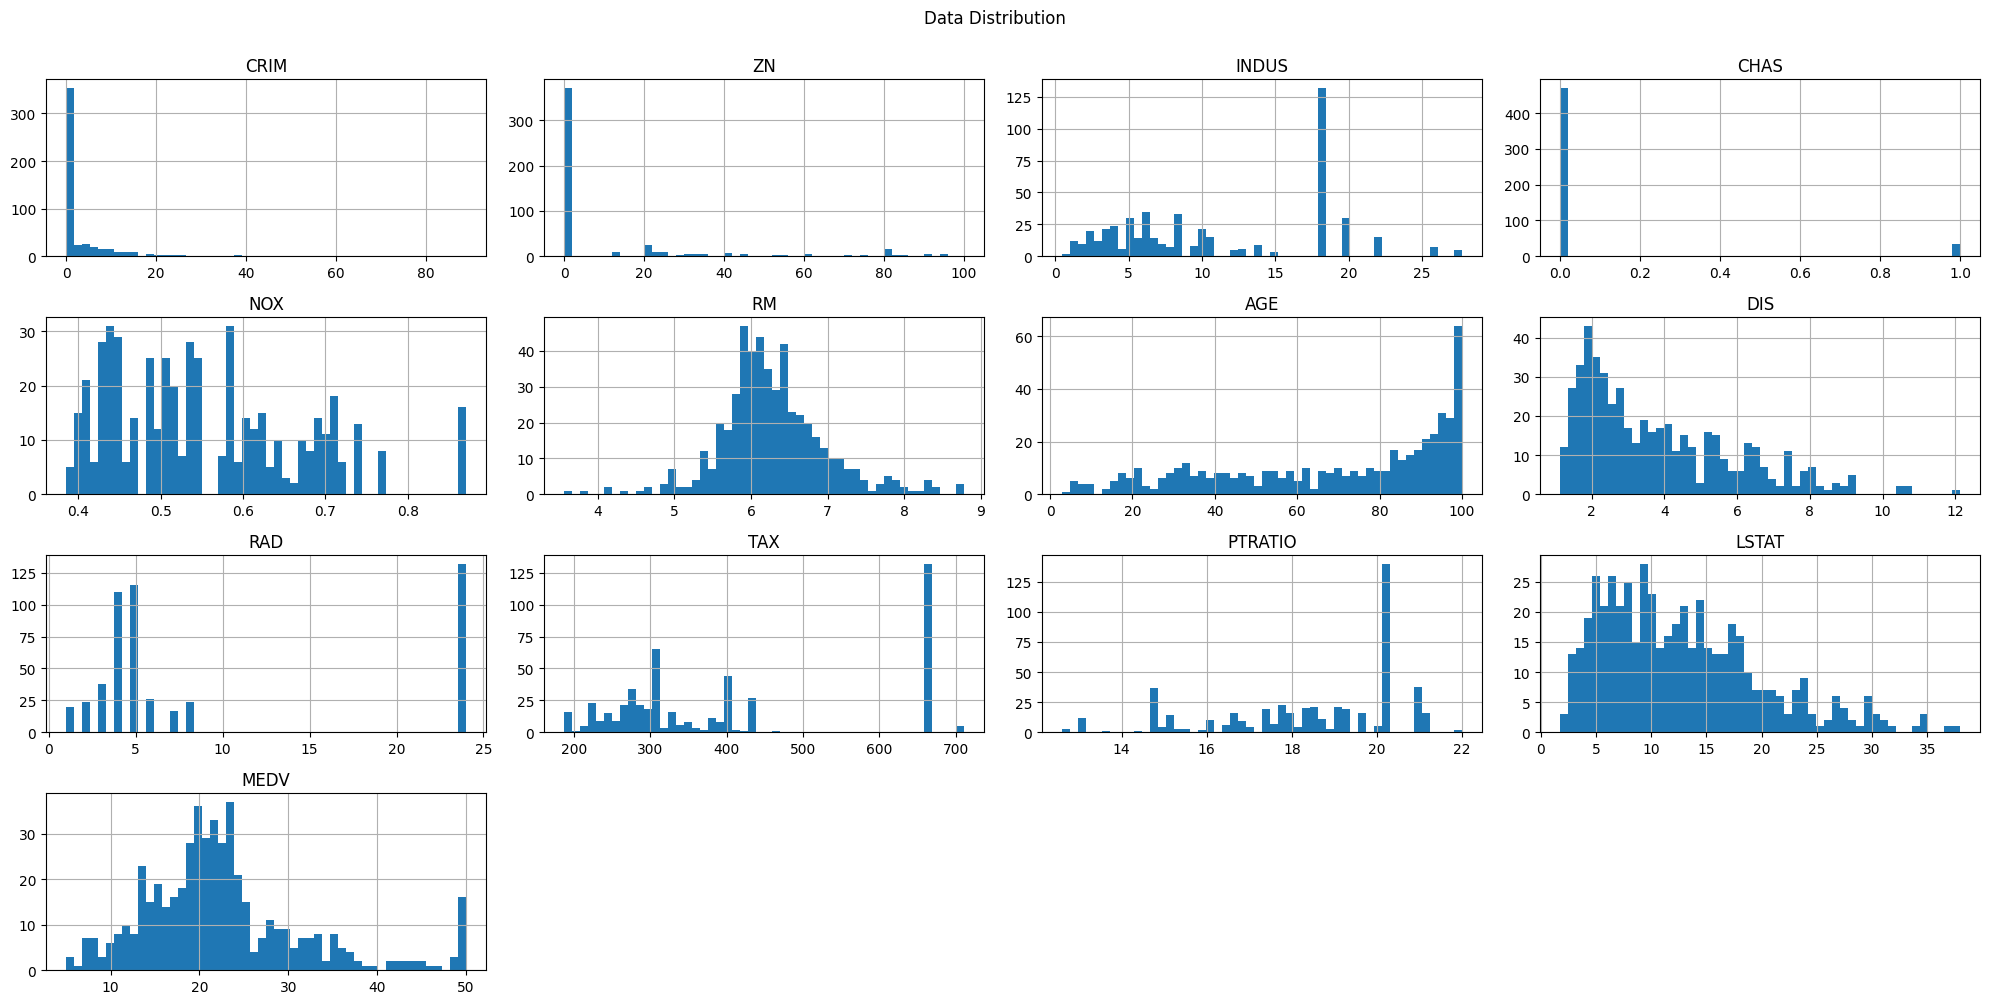

In [56]:
# Calculate Sturges' formula for number of bins
num_bins = int(np.ceil(np.log2(len(boston_df)) + 1))
print(num_bins)

boston_df.hist(bins=num_bins, figsize=(20, 10))
plt.suptitle('Data Distribution', x=0.5, y=1.0, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

boston_df.hist(bins=50, figsize=(20, 10))
plt.suptitle('Data Distribution', x=0.5, y=1.0, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

<Figure size 2000x2000 with 0 Axes>

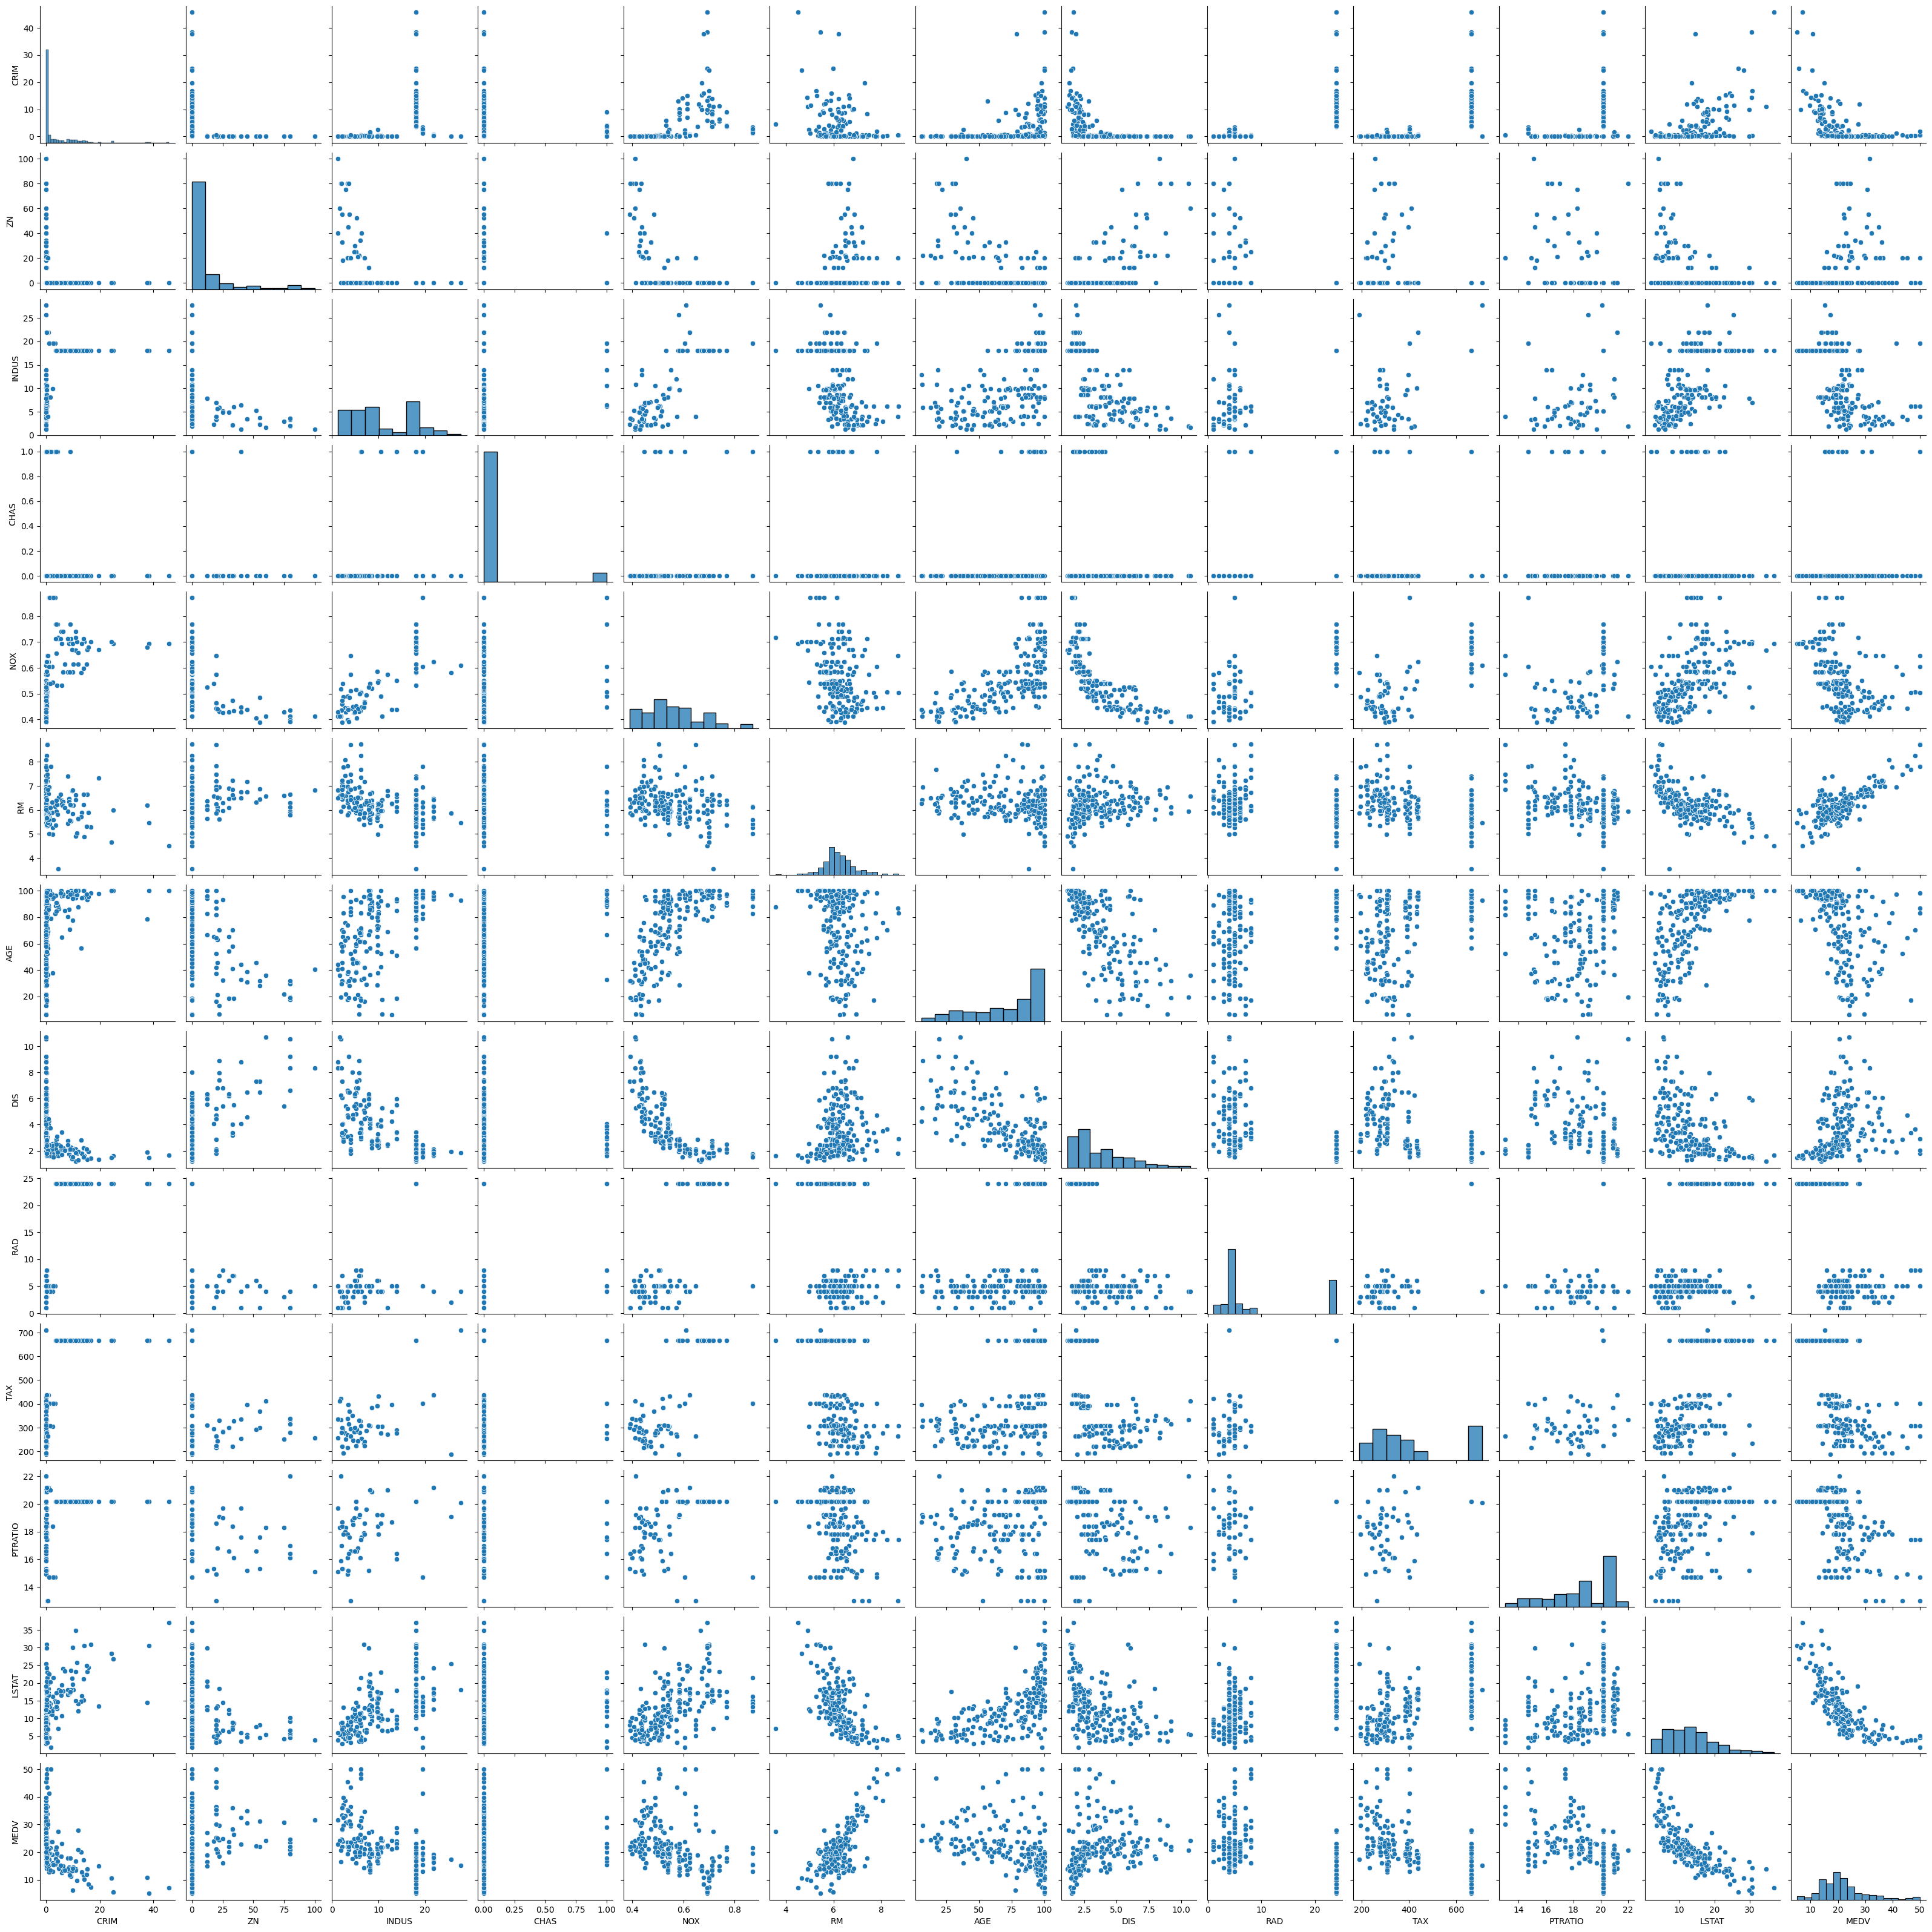

In [57]:
plt.figure(figsize=(20,20))
plt.suptitle('Pairplots of features', x=0.5, y=1.0, ha='center', fontsize='large')
sns.pairplot(boston_df.sample(200))
plt.show()

Description: Outliers are present beyond the third quartile.


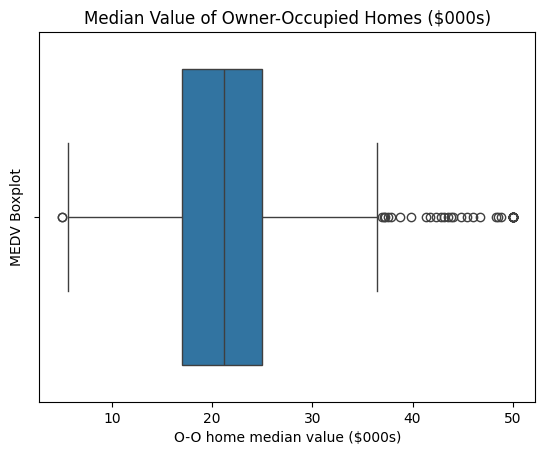

In [58]:
# Q1: For the MEDV (Median value of owner-occupied homes in $1000's) provide a box plot
box = sns.boxplot(x = 'MEDV', data = boston_df)
box.set(xlabel = "O-O home median value ($000s)"
        , ylabel = "MEDV Boxplot"
        , title = "Median Value of Owner-Occupied Homes ($000s)")
print('Description: Outliers are present beyond the third quartile.')

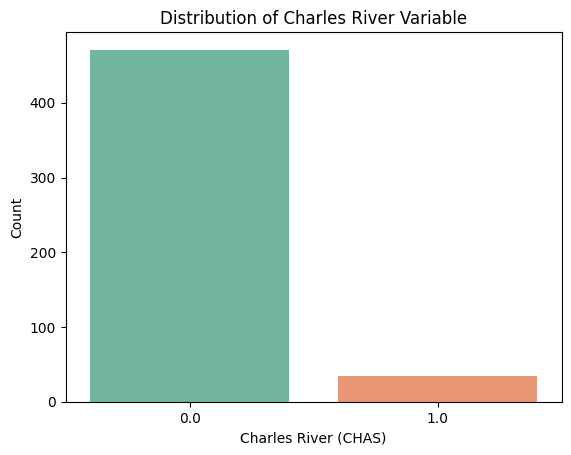

The majority of tracts do not bound the Charles River.


In [59]:
# Q2: Provide a bar plot for the Charles river variable
sns.countplot(x='CHAS', data=boston_df, hue='CHAS', palette='Set2', legend=False)

# Adding labels and title
plt.xlabel('Charles River (CHAS)')
plt.ylabel('Count')
plt.title('Distribution of Charles River Variable')

# Show the plot
plt.show()

print("The majority of tracts do not bound the Charles River.")

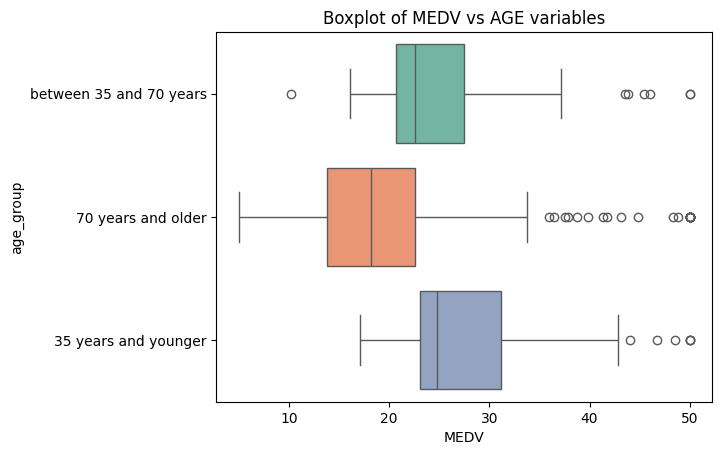

The age group under 35 pays the highest median house price, while those aged 70 and above are moving to purchase more affordable homes.


In [60]:
# Q3: Provide a boxplot for the MEDV variable vs the AGE variable.
# (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
# Age group creation
boston_df.loc[(boston_df["AGE"] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df["AGE"] > 35) & (boston_df["AGE"] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df["AGE"] >= 70), 'age_group'] = '70 years and older'

# Boxplot creation
sns.boxplot(x='MEDV', y='age_group', data=boston_df, hue='age_group', palette='Set2', legend=False)
plt.title('Boxplot of MEDV vs AGE variables')
plt.show()
print("The age group under 35 pays the highest median house price, while those aged 70 and above are moving to purchase more affordable homes.")

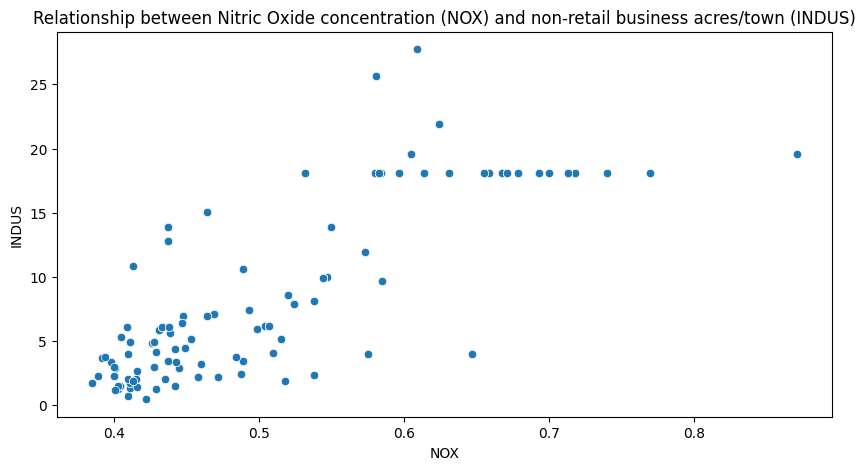

As the Nitric oxide concentrations (NOX) decrease, the proportion of non-retail business acres per town (INDUS) also tends to be lower. Observation: A linear relationship appears to exist up to NOX=0.6.


In [61]:
# Q4: Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.
# What can you say about the relationship?
plt.figure(figsize=(10,5))
sns.scatterplot(x=boston_df.NOX, y=boston_df.INDUS, data=boston_df)
plt.title("Relationship between Nitric Oxide concentration (NOX) and non-retail business acres/town (INDUS)")
plt.show()
print("As the Nitric oxide concentrations (NOX) decrease, the proportion of non-retail business acres per town (INDUS) also tends to be lower. Observation: A linear relationship appears to exist up to NOX=0.6.")

<Figure size 1000x500 with 0 Axes>

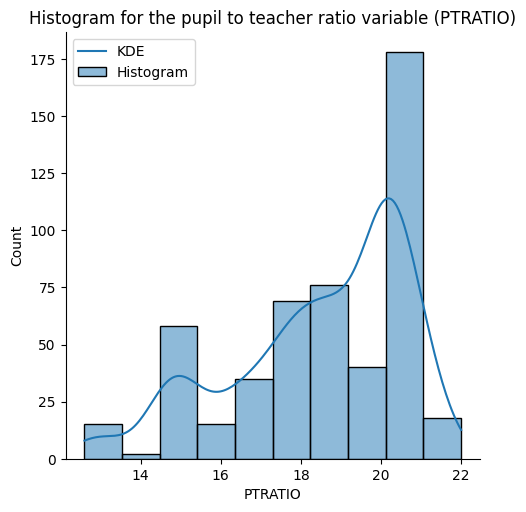

In [62]:
# Q5: Create a histogram for the pupil to teacher ratio variable.
plt.figure(figsize=(10, 5))
sns.displot(data=boston_df, x="PTRATIO", bins=10, kde=True)
plt.title("Histogram for the pupil to teacher ratio variable (PTRATIO)")
plt.legend(labels=["KDE", "Histogram"])
plt.show()

In [63]:
# Q6: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

#Hypotheses:
# Null Hypothesis (H0): The average median values of houses (MEDV) next to the Charles River (CHAS) are the same as those not next to the river.
# Null Hypothesis (H0) Assumption: There is no significant difference in the average values of houses based on their proximity to the Charles River.

# Alternative Hypothesis (H1): The average median values of houses (MEDV) next to the Charles River (CHAS) are different from those not next to the river.
# Alternative Hypothesis (H1) Assumption: There is a difference in the average values of houses depending on whether they are near the Charles River or not.

# The T-test helps us determine whether the observed differences between the two groups (houses by the river and houses not by the river) are likely due to a real difference in the population or just due to random chance.
# This test will determine if the difference in median values we see is likely a meaningful difference or something that could happen by random variation.

# Outcome:
# If the statistical analysis shows that the observed difference is highly unlikely to occur by random chance alone, we may reject the null hypothesis and conclude that there is indeed a significant difference in the median values of houses depending on whether they are near the Charles River or not.
# If there's not enough evidence, we may fail to reject the null hypothesis, suggesting that any observed differences could be due to chance.

boston_df["CHAS"].value_counts()

CHAS
0.0    471
1.0     35
Name: count, dtype: int64

In [64]:
a = boston_df[boston_df["CHAS"] == 0]["MEDV"]
a

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 471, dtype: float64

In [65]:
b = boston_df[boston_df["CHAS"] == 1]["MEDV"]
b

142    13.4
152    15.3
154    17.0
155    15.6
160    27.0
162    50.0
163    50.0
208    24.4
209    20.0
210    21.7
211    19.3
212    22.4
216    23.3
218    21.5
219    23.0
220    26.7
221    21.7
222    27.5
234    29.0
236    25.1
269    20.7
273    35.2
274    32.4
276    33.2
277    33.1
282    46.0
283    50.0
356    17.8
357    21.7
358    22.7
363    16.8
364    21.9
369    50.0
370    50.0
372    50.0
Name: MEDV, dtype: float64

In [66]:
scipy.stats.ttest_ind(a,b,axis=0,equal_var=True)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

In [67]:
print("Based on the provided output:\n(1) The p-value is very small (7.39e-05 or 0.0000739), suggesting strong evidence against the null hypothesis.\n(2) The t-statistic is negative, indicating that the average median values for the two samples are different.")
print("Conclusion: Given the small p-value, we may choose to reject the null hypothesis (H0) as the result suggests that there is significant evidence to support \nthe alternative hypothesis (H1) that the average median values of houses bounded by the Charles River are different from those not bounded by the river.")
print("In practical terms, this could mean that there is a statistically significant difference in median house values between properties near the Charles River and those not near the river.")

Based on the provided output:
(1) The p-value is very small (7.39e-05 or 0.0000739), suggesting strong evidence against the null hypothesis.
(2) The t-statistic is negative, indicating that the average median values for the two samples are different.
Conclusion: Given the small p-value, we may choose to reject the null hypothesis (H0) as the result suggests that there is significant evidence to support 
the alternative hypothesis (H1) that the average median values of houses bounded by the Charles River are different from those not bounded by the river.
In practical terms, this could mean that there is a statistically significant difference in median house values between properties near the Charles River and those not near the river.


In [68]:
# Q7: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
from scipy.stats import f_oneway

# Create separate arrays for each group
age_groups = []
for age in boston_df['AGE'].unique():
    age_groups.append(boston_df['MEDV'][boston_df['AGE'] == age])

# Perform ANOVA
f_statistic, p_value = f_oneway(*age_groups)

# Results printout
print(f"ANOVA - F-Statistic: {f_statistic}, p-value: {p_value}")

# Results interpretation 
alpha = 0.05
if p_value < alpha:
    print("Since the p-value is < alpha of 0.05, there is a significant difference in median values of houses for different age groups.")
else:
    print("Since the p-value is > alpha of 0.05, there is no significant difference in median values of houses for different age groups.")

ANOVA - F-Statistic: 0.9840091646131573, p-value: 0.5539698276810093
Since the p-value is > alpha of 0.05, there is no significant difference in median values of houses for different age groups.


In [69]:
# Q8: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

# Calculate Pearson correlation coefficient and p-value
pearson, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Print the results
print("Pearson Coefficient value={0}, P-value={1}".format(pearson, p_value))

# Set a significance level (alpha)
alpha = 0.05

# Interpret the results
if p_value < alpha:
    print("There is a significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.")
else:
    print("There is no significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.")

Pearson Coefficient value=0.7636514469209151, P-value=7.913361061239527e-98
There is a significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.


In [70]:
# Q9: What is the impact of an additional weighted distance  to the five Boston employment centers on the median value of owner occupied homes? (Regression analysis)

# Perform linear regression
X = sm.add_constant(boston_df['DIS'])
model = sm.OLS(boston_df['MEDV'], X).fit()

# Print the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 28 Jan 2024   Prob (F-statistic):           1.21e-08
Time:                        22:29:51   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

In [71]:
# Assume the variable name is 'DIS_coefficient'
DIS_coefficient = model.params['DIS']

if DIS_coefficient > 0:
    print("There is a positive linear relationship between DIS and MEDV.")
elif DIS_coefficient == 0:
    print("There is no linear relationship between DIS and MEDV.")
else:
    print("There is a negative linear relationship between DIS and MEDV.")

There is a positive linear relationship between DIS and MEDV.


In [72]:
print("Since there is a positive linear relationship between DIS and MEDV, our analysis shows that as the distance to the Boston employment centers increases, the value of homes tends to go up, indicating a positive relationship between these two factors.")

Since there is a positive linear relationship between DIS and MEDV, our analysis shows that as the distance to the Boston employment centers increases, the value of homes tends to go up, indicating a positive relationship between these two factors.
